# Lab Five: Wide and Deep Networks
**- Wen Yang (47781972)**  
**- Ziling Feng (47781816)**  
**- Zheqi Wang (47711564)**  
**- Beichen Hu (47809766)** 

## Data Preparation

In this part, we preparing out dataset and dividing it into train and test. Also we identify our cross features and choose our evaluation metric.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('mushrooms.csv')
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

We import the dataset into the dataframe and found that all the variables are object type.

In [3]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


Because 'class' is conflict with Python key word, so we change the feature name 'class' to 'mushroom_class'.

In [4]:
df.rename(columns={'class':'mushroom_class'}, inplace = True)
df.mushroom_class.value_counts()

e    4208
p    3916
Name: mushroom_class, dtype: int64

.The data is organized as follows: 

|Variable | description|
|----|--------|
|cap-shape:      |x(convex), b(bell), f(flat), k(knobbed), s(sunken)|
|cap-surface:         |s(smooth), y(scaly),g(grooves), f(fibrous)|
|cap-color:      |n(brown), y(yellow), w(white), g(grey), b(buff), c(cinnamon), r(green),p(pink),u(purple), e(red)|
|bruises:  |t(bruises), f(none)|
|odor: |p(pungent), a(almond), l(anise), n(none), c(creosote), y(fishy), f(foul), m(musty),s(spicy)|
|gill-attachment:     |a(attached), d(descending), f(free), n(notched)|
|gill-spacing:   |c(close), w(crowded), d(distant)|
|gill-size:      |b(broad), n(narrow)|
|gill-color:     |n(brown), y(yellow), w(white), g(grey), b(buff), r(green),p(pink),u(purple), e(red), k(black),h(chocolate),o(orange)|
|stalk-shape:   |e(enlarging), t(tapering)|
|stalk-root:   |b(bulbous), c(club), u(cup), e(equal), z(rhizomorphs),r(root)|
|stalk-surface-above-ring: |f(fibrous),y(scaly), k(silky), s(smooth)|
|stalk-surface-below-ring: |f(fibrous),y(scaly), k(silky), s(smooth)|
|stalk-color-above-ring:   |n(brown), c(cinnamon),y(yellow), w(white), g(grey), b(buff), p(pink),e(red),o(orange)|
|stalk-color-below-ring:   |n(brown), c(cinnamon),y(yellow), w(white), g(grey), b(buff),p(pink),e(red), o(orange)|
|veil-type: |p(partial), u(universal)|
|veil-color: |n(brown),o(orange),w(white), y(yellow)|
|ring-number: |n(none), o(one),t(two)|
|ring-type: |c(cobwebby),e(evanescent),f(flaring), l(large) n(none), p(pendant),s(sheathing),z(zone)|
|spore-print-color: |n(brown),y(yellow), w(white), b(buff), o(orange),k(black), r(green), u(purple),h(chocolate)|
|population : |a(abundant),c(clustered),n(numerous),s(scattered),v(several),y(solitary)|
|habitat:|g(grasses), l(leaves), m(meadows),p(paths),u(urban),w(waste), d(woods)|
|**class(target):** | p(poison), e(eatable)|

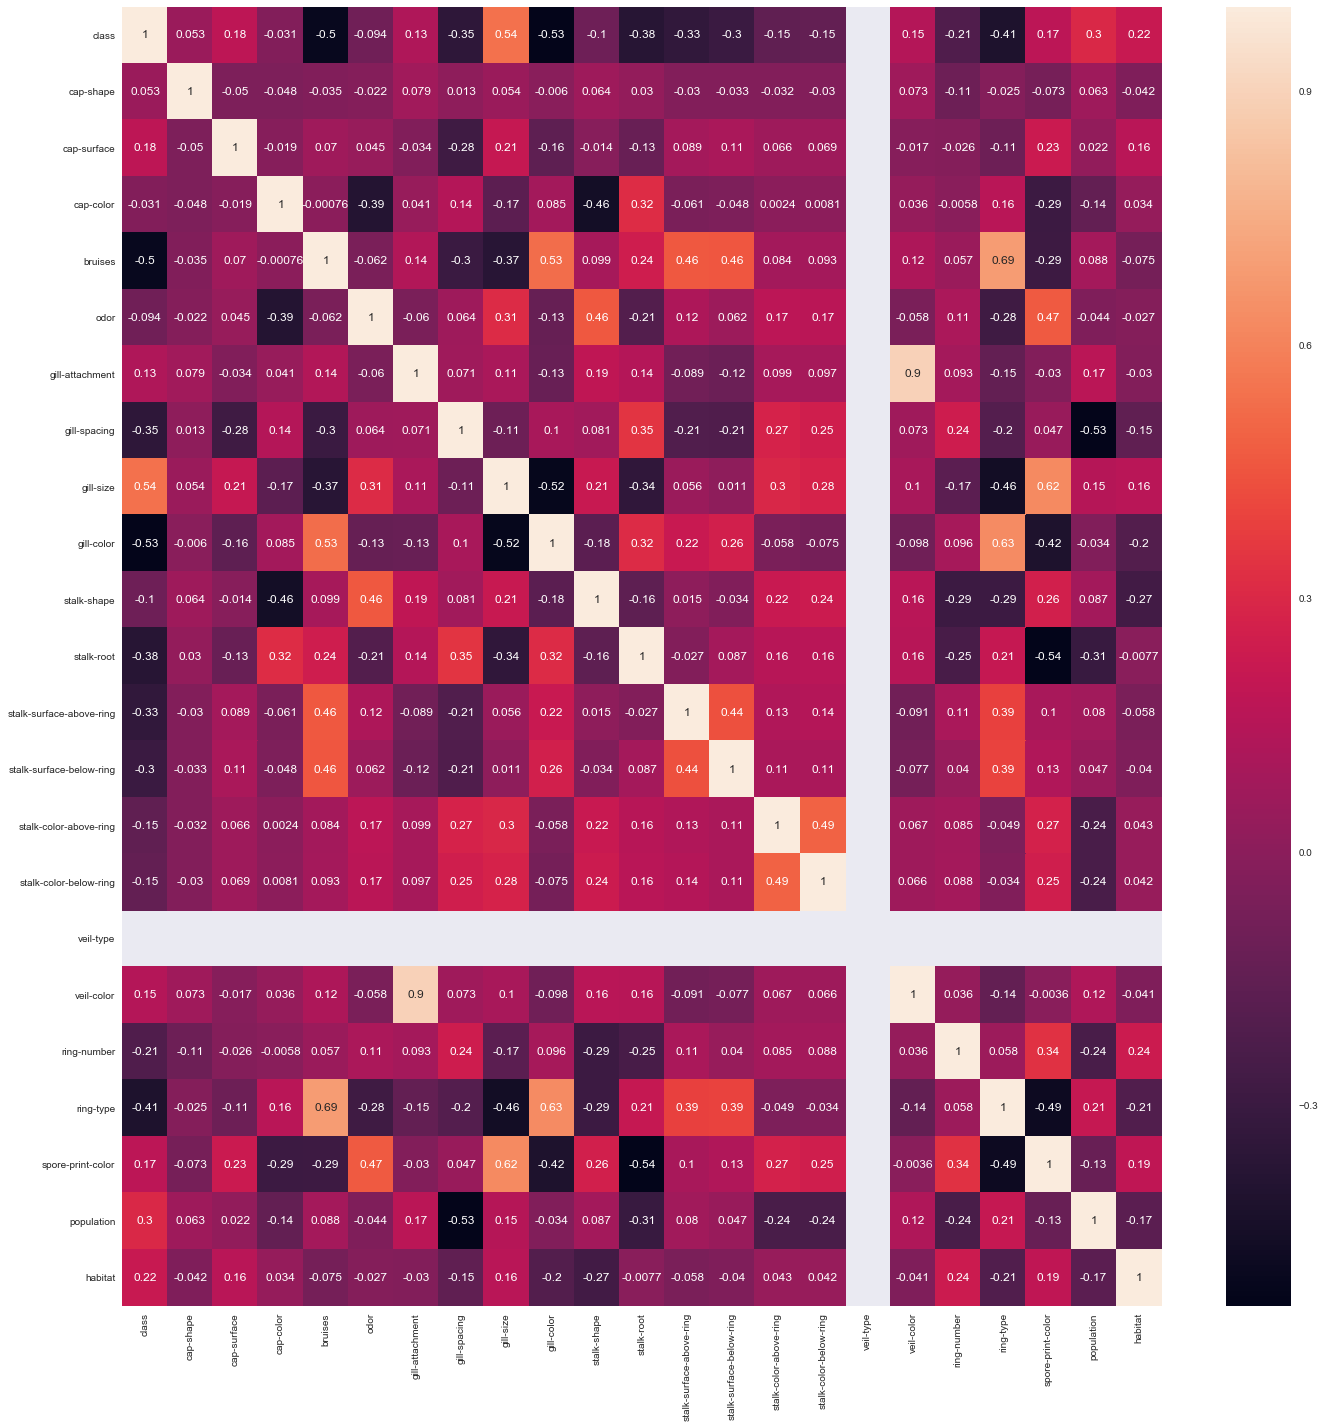

In [5]:
from sklearn.preprocessing import LabelEncoder
cmap = sns.set(style="darkgrid") # one of the many styles to plot using
df_copy = pd.read_csv('mushrooms.csv') # to draw heatmap, we need convert all strings to integers
                                       # because we need strings values after, so we read another dataframe

labelencoder=LabelEncoder()
for col in df_copy.columns:
    df_copy[col] = labelencoder.fit_transform(df_copy[col].astype(str))
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_copy.corr(), cmap=cmap, annot=True)

f.tight_layout()

We plot the heatmap to get the correlation between variables and target and found that several variables have a low correlation with it like odor and color. But according the marterial we searched online, these variables could contribute a lot to identify the toxic musherooms. The lower correlation might caused by the amount of our dataset. So, we decided keep all these variables to keep the model universality.

We split our data into training and testing set at the ratio of 9:1.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

df_train, df_test = train_test_split(df, test_size=0.1, stratify=df.mushroom_class)

We convert our dataset into integer and add them after the original dataset.

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# define objects that can encode each variable as integer    
encoders = dict() 
categorical_headers = ['cap-shape','cap-surface','cap-color',
                       'bruises','odor','gill-attachment','gill-spacing','gill-size',
                       'gill-color','stalk-shape','stalk-root',
                       'stalk-surface-above-ring' ,'stalk-surface-below-ring','stalk-color-above-ring',
                       'stalk-color-below-ring','veil-type','veil-color',
                       'ring-number','ring-type','spore-print-color','population','habitat']

# train all encoders (special case the target 'income')
for col in categorical_headers+['mushroom_class']:
    df_train[col] = df_train[col].astype(str)
    df_test[col] = df_test[col].astype(str)
    
    if col=="mushroom_class":
        tmp = LabelEncoder()
        df_train[col] = tmp.fit_transform(df_train[col])
        df_test[col] = tmp.transform(df_test[col])
    else:
        # integer encoded variables
        encoders[col] = LabelEncoder() # save the encoder
        df_train[col+'_int'] = encoders[col].fit_transform(df_train[col])
        df_test[col+'_int'] = encoders[col].transform(df_test[col])

df_test.head(10)

/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,mushroom_class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring_int,stalk-color-above-ring_int,stalk-color-below-ring_int,veil-type_int,veil-color_int,ring-number_int,ring-type_int,spore-print-color_int,population_int,habitat_int
972,0,f,f,n,t,n,f,c,b,n,...,2,6,7,0,2,1,4,2,4,0
8016,1,k,s,e,f,s,f,c,n,b,...,2,6,6,0,2,1,0,7,4,4
4769,1,x,y,g,f,f,f,c,b,h,...,1,4,4,0,2,1,2,1,4,4
8076,0,b,s,n,f,n,a,c,b,o,...,2,5,5,0,0,1,4,8,1,2
488,0,x,y,n,t,l,f,c,b,n,...,3,7,7,0,2,1,4,2,3,4
7746,0,x,s,w,f,n,f,w,b,p,...,1,7,7,0,2,2,4,7,2,1
3150,0,f,f,e,t,n,f,c,b,u,...,2,7,6,0,2,1,4,2,5,0
4443,1,x,y,y,f,f,f,c,b,h,...,1,4,0,0,2,1,2,1,5,0
2437,0,x,f,e,t,n,f,c,b,u,...,2,7,3,0,2,1,4,3,4,0
688,0,x,y,y,t,l,f,c,b,w,...,2,7,7,0,2,1,4,2,2,3


We didn't use dimensionality reduction to keep the accuracy, or scaling bacause our dataset has no numeric type of data.

We derive the target column from the splited dataset.

In [8]:
# let's start as simply as possible, without any feature preprocessing
categorical_headers_ints = [x+'_int' for x in categorical_headers]

# we will forego one-hot encoding right now and instead just scale all inputs
#   this is just to get an example running in Keras (don't ever do this)
feature_columns = categorical_headers_ints
X_train =  df_train[feature_columns].values
X_test =  df_test[feature_columns].values

y_train = df_train['mushroom_class'].values
y_test = df_test['mushroom_class'].values

print(feature_columns)

['cap-shape_int', 'cap-surface_int', 'cap-color_int', 'bruises_int', 'odor_int', 'gill-attachment_int', 'gill-spacing_int', 'gill-size_int', 'gill-color_int', 'stalk-shape_int', 'stalk-root_int', 'stalk-surface-above-ring_int', 'stalk-surface-below-ring_int', 'stalk-color-above-ring_int', 'stalk-color-below-ring_int', 'veil-type_int', 'veil-color_int', 'ring-number_int', 'ring-type_int', 'spore-print-color_int', 'population_int', 'habitat_int']


## Combine features into cross-product features

Our group decide combine following combination and we will implement in the modeling:

1. We combine cap-color and odor because we reviewed relevant literature from Internet and found that toxic mushrooms' color tend to be black, green, golden and red. According to the data, it shows that toxic mushrooms especially purple mushrooms tend to be highly toxic. Non-toxic mushrooms show a brown color. At the same time, the toxic mushrooms smell are spicy, fishy, non-toxic mushrooms smell is almond.
2. We combine gill-size and gill-color together. According to the literature, the toxic mushrooms' gill-size are narrow and its color are almost white.
3. We combine habitat and ring-type together. The toxic mushrooms grow in dark, wet or swampy environments. In addition, most toxic mushrooms have fungus rings.
4. We also combine cap-surface and ring - type together. The non-toxic mushrooms' cap-surface are relatively flat and smooth, and there is no ring on the cap-surface. The toxic mushrooms' cap-surface are thick and hard.

Therefore, these combinations can be more valuable to study, to study which combinations of toxic mushrooms are more likely to be combined. So if they're toxic, the model could prevent people from eating this combination of mushrooms in the future.

## Evaluation metric

Our data is to predict whether mushrooms are toxic. In our confusion matrix, TP represents that the non-toxic mushroom is predicted as non-toxic, FP represents that the non-toxic mushroom is predicted as toxic correctly. TN represents that the toxic mushroom is predicted as toxic correctly and FN represents that the toxic mushroom is predicted as non-toxic. The practical significance of this model is to accurately identify the toxicity of the mushroom to determine if the mushroom is edible. 
Once people eat poisonous mushrooms, they may cause great harm to the body and even their lives. The most common consequence of mushroom poisoning is gastrointestinal discomfort. Most toxic mushrooms contain gastrointestinal irritants that cause vomiting and diarrhea (sometimes requiring hospitalization), but usually do not cause long-term damage. However, there are also many recognized mushroom toxins that have specific or even fatal effects. Therefore, if a toxic mushroom is judged as non-toxic, it will increase the possibility of eating by mistake. In the fusion matrix, FN reflects the possibility more, that is, toxic mushrooms are mistakenly considered to be non-toxic. We want to reduce FN. Using recall as our evaluate matrix, which is more focused on FN. So recall is more able to support the prediction goals of our dataset.

The function of recall as below:
$$Recall_{macro} = \frac{ T_{1} + ... + T_{n}}{(T_{1} + ... + T_{n} + F_{1} + ... + F_{n})*n}$$

## Split data
We use more than one method to split our data: first we just divided our data into training and testing data. Because our target categories(ediable and poision) are quite balance, we just divide dataset using proportion 9：1. We use the train and test to build our model.  
Once we build our model successfully, we use k-fold to split dataset to do cross validation.  
We use k-fold because our dataset size is small, so it is suitable to use k-fold as cross validation method.  

K-fold divides the dataset into K groups (K-Fold), and each subset data is used as a verification set, and the remaining K-1 subset data is used as a training set. The K folds training part respectively apply to model and evaluate the results in the verification set. At last, MSE (Mean Squared Error) is applied to the obtained cross-validation error.   
This method could effectively utilize limited data, and the results of the evaluation can be as close as possible to the performance of the model on the test set, and can be used as an indicator for model optimization.  
*Reference:https://www.jianshu.com/p/284581d9b189*

# Modeling

Firstly, let's import all packages we need. By the way, all code below modify from Dr.Larson's code on class.

In [9]:
from sklearn import metrics as mt
import keras
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Concatenate
from keras.models import Model
import keras_metrics

/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In this part, we build up the deep neuro network and train that when we can get the performance by using recall evaluate metric.

In [10]:
X_train = df_train[feature_columns].values
X_test = df_test[feature_columns].values

# This returns a tensor
inputs = Input(shape=(X_train.shape[1],))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(units=10, activation='relu')(inputs)
x = Dense(units=5, activation='tanh')(x)
# x = Dense(units = 20, activation = 'silu')(x)
predictions = Dense(1,activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

In [11]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=[keras_metrics.recall()])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 22)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                230       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [12]:
%%time

model.fit(X_train, y_train, epochs=10, batch_size=50, verbose=0)

from sklearn import metrics as mt
yhat_proba = model.predict(X_test)
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test,yhat),mt.recall_score(y_test,yhat))

[[408  13]
 [ 97 295]] 0.7525510204081632
CPU times: user 3.94 s, sys: 436 ms, total: 4.38 s
Wall time: 2.35 s


## One Hot Encoding Categorical Data

In this part, we translate categories from int type to one hot coding in order to make sure whether or not it will increase accuracy and better performance comparing with int type.

In [13]:
# but we were dealing with the data incorrectly because we didn't one hot encode the 
#   categorical features
from sklearn.preprocessing import OneHotEncoder

# now let's encode the integer outputs as one hot encoded labels
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(df_train[categorical_headers_ints].values)
X_test_ohe = ohe.transform(df_test[categorical_headers_ints].values)

# the ohe instance will help us to organize our encoded matrix
print(ohe.feature_indices_)
print(X_train_ohe.shape)
print(type(X_train_ohe), '========THIS IS SPARSE ENCODED=======')

[  0   6  10  20  22  31  33  35  37  49  51  56  60  64  73  82  83  87
  90  95 104 110 117]
(7311, 117)
<class 'scipy.sparse.csr.csr_matrix'> ========THIS IS SPARSE ENCODED=======


In [14]:

# This returns a tensor
# the input can only be a scipy.sparse array
inputs = Input(shape=(X_train_ohe.shape[1],), sparse=True)

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(units=10, activation='relu')(inputs)
predictions = Dense(1,activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=[keras_metrics.recall()])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 117)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1180      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,191
Trainable params: 1,191
Non-trainable params: 0
_________________________________________________________________


In [15]:
%%time
model.fit(X_train_ohe,y_train, epochs=10, batch_size=50, verbose=0)

# test on the data
yhat = np.round(model.predict(X_test_ohe))
print(mt.confusion_matrix(y_test,yhat),mt.recall_score(y_test,yhat))

[[405  16]
 [  9 383]] 0.9770408163265306
CPU times: user 5.86 s, sys: 411 ms, total: 6.27 s
Wall time: 4.35 s


After modeling, we can see that the accuracy of one hot coding is much better than int type when it input into the same model by using recall metric. 

# Crossed Columns and Deep Embeddings


## Step One: Using Dense embeddings

In this modeling, we build the deep neuron network, we embed our input and then flat them, then we use dense function as our layer. Then we can see this model performance and accuracy by using accuracy function. 

In [16]:
from keras.layers import concatenate
embed_branches = []
X_ints_train = [] # keep track of inputs for each branch
X_ints_test = []# keep track of inputs for each branch
all_inputs = [] # this is what we will give to keras.Model inputs
all_branch_outputs = [] # this is where we will keep track of output of each branch

for col in categorical_headers_ints:
    # encode as ints for the embedding
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append( inputs ) # keep track of created inputs
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_branch_outputs.append(x)

# merge the branches together
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=1,activation='sigmoid', name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)

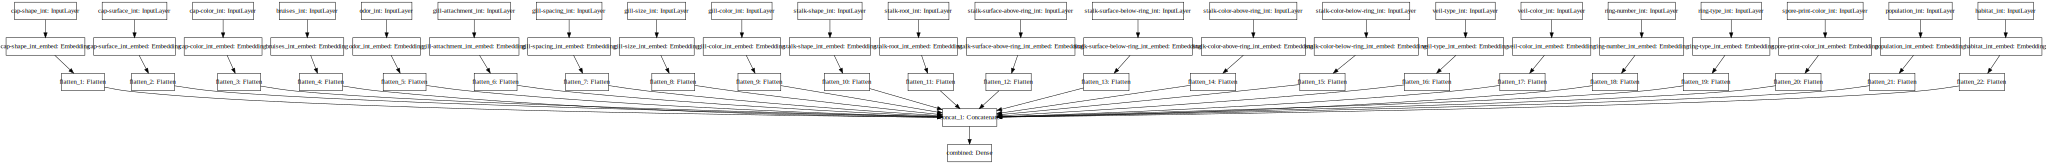

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=[keras_metrics.recall()])

model.fit(X_ints_train, # create a list of inputs for embeddings
        y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
7311/7311 [==============================] - 2s 241us/step - loss: 0.2403 - recall: 0.8488
Epoch 2/10
7311/7311 [==============================] - 1s 99us/step - loss: 0.2245 - recall: 0.7920
Epoch 3/10
7311/7311 [==============================] - 1s 96us/step - loss: 0.2077 - recall: 0.7968
Epoch 4/10
7311/7311 [==============================] - 1s 100us/step - loss: 0.1891 - recall: 0.8005
Epoch 5/10
7311/7311 [==============================] - 1s 97us/step - loss: 0.1692 - recall: 0.8147
Epoch 6/10
7311/7311 [==============================] - 1s 100us/step - loss: 0.1491 - recall: 0.8334
Epoch 7/10
7311/7311 [==============================] - 1s 98us/step - loss: 0.1302 - recall: 0.8510
Epoch 8/10
7311/7311 [==============================] - 1s 98us/step - loss: 0.1137 - recall: 0.8601
Epoch 9/10
7311/7311 [==============================] - 1s 102us/step - loss: 0.0998 - recall: 0.8624
Epoch 10/10
7311/7311 [==============================] - 1s 100us/step - loss: 0.0885 -

In [19]:
yhat = np.round(model.predict(X_ints_test))
print(mt.confusion_matrix(y_test,yhat),mt.recall_score(y_test,yhat))

[[421   0]
 [ 55 337]] 0.8596938775510204


The accuracy of this model is 85.96%.

## Step Two: Making Crossed Columns

We implement our combinations mentioned before, we build up the wide neuron network, also we embed the input then we flat them, finally, we use dense as our layer. Then we show the accuracy of this model.

In [20]:
# Code modified from Professor Larson's code

cross_columns = [['cap-color','odor'],
                 ['gill-size', 'gill-color'],
                 ['habitat','ring-type'],
                 ['cap-surface','ring-type']]

# we will create separate sequential models for each embedding
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_branch_outputs = []

for cols in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    # 2. encode as integers
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    
    # 3. save encodings in a list for each branch
    X_ints_train.append( X_crossed_train )
    X_ints_test.append( X_crossed_test )
    
    # get the number of categories in the crossing
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the crossed encoding
    inputs = Input(shape=(1,),dtype='int32',name='_'.join(cols))
    all_inputs.append(inputs) # save this as input for the keras.Model
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name='_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_branch_outputs.append(x) # save for concatenating later
    
# merge the branches together
final_branch = concatenate(all_branch_outputs)
# add a layer after merging
final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)

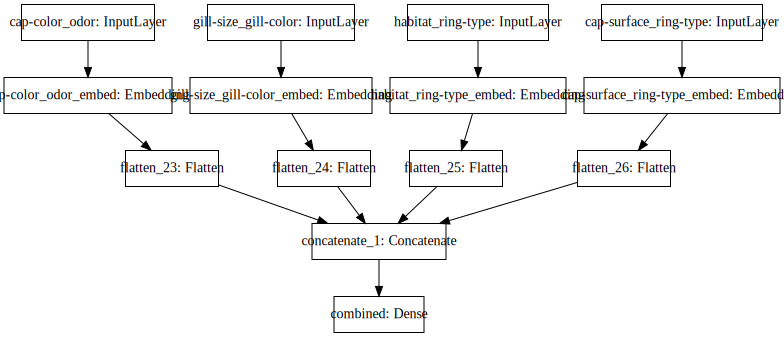

In [21]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [22]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=[keras_metrics.recall()])

model.fit(X_ints_train,
        y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
7311/7311 [==============================] - 1s 101us/step - loss: 0.2441 - recall: 0.5255
Epoch 2/10
7311/7311 [==============================] - 0s 44us/step - loss: 0.2241 - recall: 0.7177
Epoch 3/10
7311/7311 [==============================] - 0s 46us/step - loss: 0.2054 - recall: 0.7755
Epoch 4/10
7311/7311 [==============================] - 0s 45us/step - loss: 0.1874 - recall: 0.8019
Epoch 5/10
7311/7311 [==============================] - 0s 45us/step - loss: 0.1703 - recall: 0.8087
Epoch 6/10
7311/7311 [==============================] - 0s 44us/step - loss: 0.1543 - recall: 0.8167
Epoch 7/10
7311/7311 [==============================] - 0s 47us/step - loss: 0.1399 - recall: 0.8243
Epoch 8/10
7311/7311 [==============================] - 0s 45us/step - loss: 0.1271 - recall: 0.8289
Epoch 9/10
7311/7311 [==============================] - 0s 47us/step - loss: 0.1159 - recall: 0.8343
Epoch 10/10
7311/7311 [==============================] - 0s 47us/step - loss: 0.1063 - rec

In [23]:
yhat = np.round(model.predict(X_ints_test))
print(mt.confusion_matrix(y_test,yhat),mt.recall_score(y_test,yhat))

[[416   5]
 [ 63 329]] 0.8392857142857143


The accuracy of this model is 0.83

## Step Three (Final): Combining Crossed Linear Classifier and Deep Embeddings

We combine both deep and wide neuron network together.

First, we create wide neuron network and concatenate, dense them together. <br />
Then, we create deep neuron network and concatenate, dense them together.<br />
Last, we combine deep and neuron network together then concatenate, dense them together. <br />
Each dense as our layer architecture. 

Furthmore, we also build up two architecture which has different number of layers. <br />
First model has 3 hidden layers.
<br />Second model has 6 hindden layers.



## Model One

In [24]:
# All code modify from Larson's code
cross_columns = [['cap-color','odor'],
                 ['gill-size', 'gill-color'],
                 ['habitat','ring-type'],
                 ['cap-surface','ring-type']]

#'workclass','education','marital_status','occupation','relationship','race','sex','country'

# we need to create separate lists for each branch
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []

for cols in cross_columns:
    # encode crossed columns as ints for the embedding
    enc = LabelEncoder()
    
    # create crossed labels
    X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    X_ints_train.append( X_crossed_train )
    X_ints_test.append( X_crossed_test )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name = '_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
# merge the branches together
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=1,activation='sigmoid',name='wide_combined')(wide_branch)

# reset this input branch
all_deep_branch_outputs = []
# add in the embeddings
for col in categorical_headers_ints:
    # encode as ints for the embedding
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)
    
# also get a dense branch of the numeric features
# all_inputs.append(Input(shape=(X_train_num.shape[1],),
#                         sparse=False,
#                         name='numeric_data'))

# x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
# all_deep_branch_outputs.append( x )

# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)

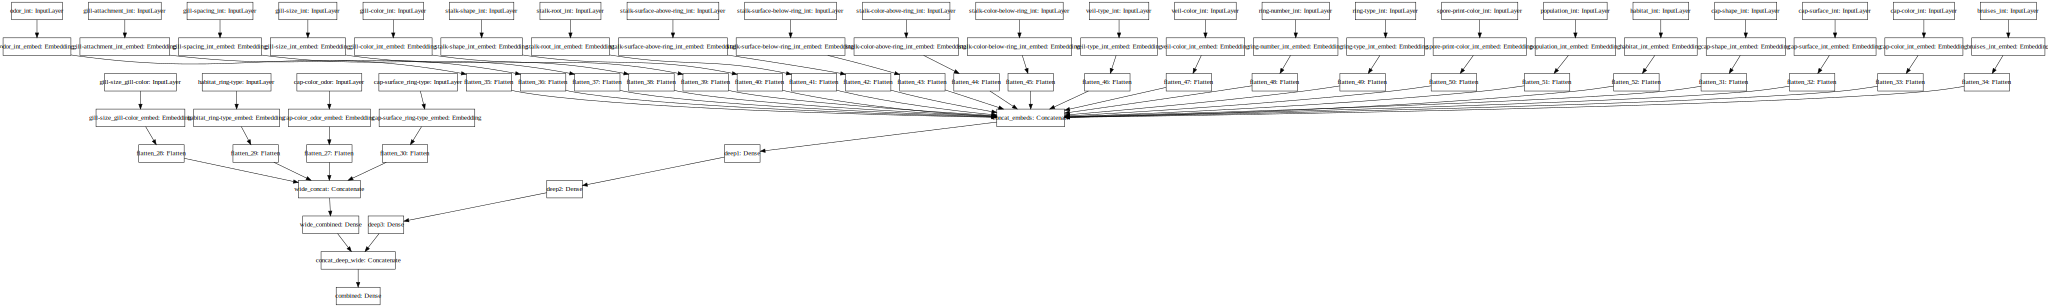

In [25]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [26]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[keras_metrics.recall()])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit(X_ints_train,
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = (X_ints_test, y_test))

Train on 7311 samples, validate on 813 samples
Epoch 1/10
7311/7311 [==============================] - 3s 433us/step - loss: 0.0194 - recall: 0.9583 - val_loss: 0.0018 - val_recall: 0.9974
Epoch 2/10
7311/7311 [==============================] - 1s 156us/step - loss: 0.0014 - recall: 0.9980 - val_loss: 6.8481e-04 - val_recall: 1.0000
Epoch 3/10
7311/7311 [==============================] - 1s 155us/step - loss: 6.0328e-04 - recall: 0.9997 - val_loss: 3.1206e-04 - val_recall: 1.0000
Epoch 4/10
7311/7311 [==============================] - 1s 158us/step - loss: 2.9791e-04 - recall: 1.0000 - val_loss: 1.6581e-04 - val_recall: 1.0000
Epoch 5/10
7311/7311 [==============================] - 1s 159us/step - loss: 1.9184e-04 - recall: 1.0000 - val_loss: 1.1355e-04 - val_recall: 1.0000
Epoch 6/10
7311/7311 [==============================] - 1s 163us/step - loss: 1.3398e-04 - recall: 1.0000 - val_loss: 8.7421e-05 - val_recall: 1.0000
Epoch 7/10
7311/7311 [==============================] - 1s 160us/

In [27]:
yhat = np.round(model.predict(X_ints_test))
print(mt.confusion_matrix(y_test,yhat), mt.accuracy_score(y_test,yhat))

[[421   0]
 [  0 392]] 1.0


In is model, the accuracy even reach to 1 !!!

Text(0.5,0,'epochs')

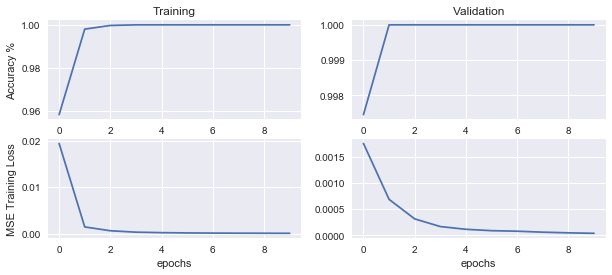

In [28]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['recall'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_recall'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('MSE Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

After visualizing the performance of the model 1, we found that gradient start convergence at about 4th epoch in validation. And converging at first epoch in training.

## Model Two

In [29]:
# 'workclass','education','marital_status',
# 'occupation','relationship','race',
# 'sex','country'

cross_columns = [['cap-color','odor'],
                 ['gill-size', 'gill-color'],
                 ['habitat','ring-type'],
                 ['cap-surface','ring-type']]

#'workclass','education','marital_status','occupation','relationship','race','sex','country'

# we need to create separate lists for each branch
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []

for cols in cross_columns:
    # encode crossed columns as ints for the embedding
    enc = LabelEncoder()
    
    # create crossed labels
    X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    X_ints_train.append( X_crossed_train )
    X_ints_test.append( X_crossed_test )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name = '_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
# merge the branches together
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=1,activation='sigmoid',name='wide_combined')(wide_branch)

# reset this input branch
all_deep_branch_outputs = []
# add in the embeddings
for col in categorical_headers_ints:
    # encode as ints for the embedding
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)
    
# also get a dense branch of the numeric features
# all_inputs.append(Input(shape=(X_train_num.shape[1],),
#                         sparse=False,
#                         name='numeric_data'))

# x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
# all_deep_branch_outputs.append( x )

# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
# We add three more layers
deep_branch = Dense(units=10,activation='relu', name='deep4')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep5')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep6')(deep_branch)
    
final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

model2 = Model(inputs=all_inputs, outputs=final_branch)

In [30]:
%%time

model2.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[keras_metrics.recall()])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model2.fit(X_ints_train,
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = (X_ints_test, y_test))

Train on 7311 samples, validate on 813 samples
Epoch 1/10
7311/7311 [==============================] - 4s 484us/step - loss: 0.0373 - recall: 0.9677 - val_loss: 0.0020 - val_recall: 0.9974
Epoch 2/10
7311/7311 [==============================] - 1s 178us/step - loss: 0.0012 - recall: 0.9980 - val_loss: 0.0013 - val_recall: 0.9974
Epoch 3/10
7311/7311 [==============================] - 1s 193us/step - loss: 9.9525e-04 - recall: 0.9980 - val_loss: 0.0012 - val_recall: 0.9974
Epoch 4/10
7311/7311 [==============================] - 1s 179us/step - loss: 9.5758e-04 - recall: 0.9980 - val_loss: 0.0012 - val_recall: 0.9974
Epoch 5/10
7311/7311 [==============================] - 1s 179us/step - loss: 9.7760e-04 - recall: 0.9980 - val_loss: 0.0011 - val_recall: 0.9974
Epoch 6/10
7311/7311 [==============================] - 1s 178us/step - loss: 5.1610e-04 - recall: 0.9991 - val_loss: 7.9411e-05 - val_recall: 1.0000
Epoch 7/10
7311/7311 [==============================] - 1s 192us/step - loss: 7.8

In [31]:
yhat = np.round(model2.predict(X_ints_test))
print(mt.confusion_matrix(y_test,yhat), mt.recall_score(y_test,yhat))

[[421   0]
 [  0 392]] 1.0


Text(0.5,0,'epochs')

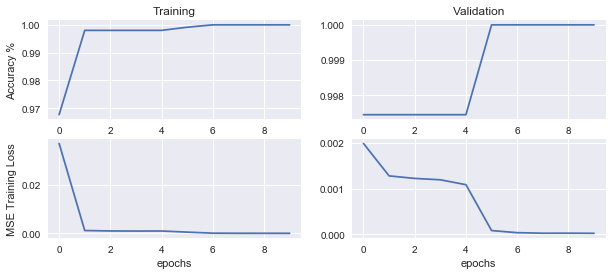

In [32]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['recall'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_recall'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('MSE Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

Compare the two different model above, we can see both of the models, each model is converged when the epochs is 1 in Training set. And model one converged when the epochs is 4 in Validation set. Model two converged when the epochs is 5 in Validation set. Also, in validation set, the seconde model, the hidden layers is 6, it has a lower convergence rate than model 1. And the accuracy is the same. 

## Apply cross validation & recall  
### Model with K-fold

In this part, we use k-fold to split our dataset. Then we use each fold to build our model and then calculate the average of the whole fold performance and accuracy comparing the two models including 3 hidden layers and 6 hidden layers by using recall metric.

In [33]:
skf = StratifiedKFold(n_splits= 10, shuffle=True)

recall_score = []
recall_score2 = []
roc_auc_score1 = []
roc_auc_score2 = []
for i, (train, test) in enumerate(skf.split(df_train[feature_columns].values, df_train['mushroom_class'].values)):
    print(f"Fold {i}")

    X_train_ = df_train.iloc[train]
    X_train2_ = X_train_
    X_test_ = df_train.iloc[test]
    X_test2_ = X_test_
    y_train_ = df_train['mushroom_class'].iloc[train].values.astype(np.int)
    y_train2_ = y_train_ 
    y_test_ = df_train['mushroom_class'].iloc[test].values.astype(np.int)
    y_test2_ = y_test_
    
    
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_wide_branch_outputs = []

    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()

        # create crossed labels
        X_crossed_train = X_train_[cols].apply(lambda x: '_'.join(x), axis=1)
        X_crossed_test = X_test_[cols].apply(lambda x: '_'.join(x), axis=1)

        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name = '_'.join(cols)+'_embed')(inputs)
        x = Flatten()(x)
        all_wide_branch_outputs.append(x)

    # merge the branches together
    wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
    wide_branch = Dense(units=1,activation='sigmoid',name='wide_combined')(wide_branch)

    # reset this input branch
    all_deep_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( X_train_[col].values )
        X_ints_test.append( X_test_[col].values )

        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])

        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, 
                      output_dim=int(np.sqrt(N)), 
                      input_length=1, name=col+'_embed')(inputs)
        x = Flatten()(x)
        all_deep_branch_outputs.append(x)

    # merge the deep branches together FOR 4 LAYERS IN MODEL 1  
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

    final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

    model = Model(inputs=all_inputs, outputs=final_branch)
    
    # merge the deep branches together FOR 7 LAYERS IN MODEL 2
    deep_branch2 = concatenate(all_deep_branch_outputs,name='concat_embeds')
    deep_branch2 = Dense(units=50,activation='relu', name='deep1')(deep_branch2)
    deep_branch2 = Dense(units=25,activation='relu', name='deep2')(deep_branch2)
    deep_branch2 = Dense(units=10,activation='relu', name='deep3')(deep_branch2)
    deep_branch2 = Dense(units=10,activation='relu', name='deep4')(deep_branch2)
    deep_branch2 = Dense(units=10,activation='relu', name='deep5')(deep_branch2)
    deep_branch2 = Dense(units=10,activation='relu', name='deep6')(deep_branch2)

    final_branch2 = concatenate([wide_branch, deep_branch2],name='concat_deep_wide')
    final_branch2 = Dense(units=1,activation='sigmoid',name='combined')(final_branch2)

    model2 = Model(inputs=all_inputs, outputs=final_branch2)


    %%time

    model.compile(optimizer='adagrad',
                  loss='mean_squared_error',
                  metrics=[keras_metrics.recall()])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history = model.fit(X_ints_train,
                        y_train_, 
                        epochs=10, 
                        batch_size=32, 
                        verbose=1, 
                        validation_data = (X_ints_test, y_test_))

    yhat = np.round(model.predict(X_ints_test))
    recall_score.append(mt.recall_score(y_test_,yhat))
    roc_auc_score1.append(mt.roc_auc_score(y_test_, yhat))
    print(mt.confusion_matrix(y_test_,yhat), mt.recall_score(y_test_,yhat))
    
    model2.compile(optimizer='adagrad',
                  loss='mean_squared_error',
                  metrics=[keras_metrics.recall()])

    # lets also add the history variable to see how we are doing
    # and lets add a validation set to keep track of our progress
    history2 = model2.fit(X_ints_train,
                        y_train_, 
                        epochs=10, 
                        batch_size=32, 
                        verbose=1, 
                        validation_data = (X_ints_test, y_test_))

    yhat2 = np.round(model.predict(X_ints_test))
    recall_score2.append(mt.recall_score(y_test_,yhat2))
    roc_auc_score2.append(mt.roc_auc_score(y_test_, yhat2))
    print(mt.confusion_matrix(y_test_,yhat2), mt.recall_score(y_test_,yhat2))


print(recall_score)
print(recall_score2)

Fold 0
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs
Train on 6579 samples, validate on 732 samples
Epoch 1/10
6579/6579 [==============================] - 3s 484us/step - loss: 0.0254 - recall: 0.9527 - val_loss: 0.0024 - val_recall: 0.9972
Epoch 2/10
6579/6579 [==============================] - 1s 161us/step - loss: 0.0017 - recall: 0.9975 - val_loss: 8.1757e-04 - val_recall: 1.0000
Epoch 3/10
6579/6579 [==============================] - 1s 163us/step - loss: 8.4553e-04 - recall: 0.9984 - val_loss: 3.4242e-04 - val_recall: 1.0000
Epoch 4/10
6579/6579 [==============================] - 1s 163us/step - loss: 4.6324e-04 - recall: 0.9997 - val_loss: 3.4698e-04 - val_recall: 1.0000
Epoch 5/10
6579/6579 [==============================] - 1s 162us/step - loss: 3.0126e-04 - recall: 1.0000 - val_loss: 3.0154e-04 - val_recall: 1.0000
Epoch 6/10
6579/6579 [==============================] - 1s 165us/step - loss: 2.0442e-04 - recall: 1.0000 - val_loss: 2.3822e-04 - val_recall: 1

Epoch 2/10
6579/6579 [==============================] - 1s 194us/step - loss: 5.3209e-04 - recall: 0.9994 - val_loss: 2.6716e-04 - val_recall: 1.0000
Epoch 3/10
6579/6579 [==============================] - 1s 192us/step - loss: 1.7801e-04 - recall: 1.0000 - val_loss: 2.4520e-04 - val_recall: 1.0000
Epoch 4/10
6579/6579 [==============================] - 1s 193us/step - loss: 9.1904e-05 - recall: 1.0000 - val_loss: 1.2902e-04 - val_recall: 1.0000
Epoch 5/10
6579/6579 [==============================] - 1s 192us/step - loss: 6.2442e-05 - recall: 1.0000 - val_loss: 9.1934e-05 - val_recall: 1.0000
Epoch 6/10
6579/6579 [==============================] - 1s 190us/step - loss: 4.6478e-05 - recall: 1.0000 - val_loss: 8.0545e-05 - val_recall: 1.0000
Epoch 7/10
6579/6579 [==============================] - 1s 193us/step - loss: 3.6075e-05 - recall: 1.0000 - val_loss: 6.0653e-05 - val_recall: 1.0000
Epoch 8/10
6579/6579 [==============================] - 1s 193us/step - loss: 2.8205e-05 - recall: 1

Epoch 3/10
6580/6580 [==============================] - 1s 178us/step - loss: 0.0010 - recall: 0.9984 - val_loss: 5.3251e-04 - val_recall: 1.0000
Epoch 4/10
6580/6580 [==============================] - 1s 190us/step - loss: 6.4567e-04 - recall: 0.9994 - val_loss: 4.2489e-04 - val_recall: 1.0000
Epoch 5/10
6580/6580 [==============================] - 1s 186us/step - loss: 4.0437e-04 - recall: 1.0000 - val_loss: 2.5497e-04 - val_recall: 1.0000
Epoch 6/10
6580/6580 [==============================] - 1s 185us/step - loss: 3.0358e-04 - recall: 1.0000 - val_loss: 1.7942e-04 - val_recall: 1.0000
Epoch 7/10
6580/6580 [==============================] - 1s 181us/step - loss: 2.2809e-04 - recall: 1.0000 - val_loss: 1.6946e-04 - val_recall: 1.0000
Epoch 8/10
6580/6580 [==============================] - 1s 178us/step - loss: 1.7675e-04 - recall: 1.0000 - val_loss: 1.0528e-04 - val_recall: 1.0000
Epoch 9/10
6580/6580 [==============================] - 1s 182us/step - loss: 1.3739e-04 - recall: 1.000

In [34]:
print("The performance of three deep layers:",sum(recall_score) / float(len(recall_score)))
print("The performance of six deep layers:",sum(recall_score2) / float(len(recall_score2)))

The performance of three deep layers: 1.0
The performance of six deep layers: 0.998581155034767


Here is the two performance of two models, so the first model with 3 hidden layers has a higher performance than the second model with 6 hidden layers.

---
## Compare with MLP

In this part, we create the MLP and then compare with the best model which is model 1 with 3 hidden layers. 

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df_train.columns:
    df_train[col] = labelencoder.fit_transform(df_train[col].astype(str))
for col in df_test.columns:
    df_test[col] = labelencoder.fit_transform(df_test[col].astype(str))

/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/zheqiwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
X_train =  df_train[feature_columns].values
X_test =  df_test[feature_columns].values

y_train = df_train['mushroom_class'].values
y_test = df_test['mushroom_class'].values

In [38]:
%%time
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
num_folds = 10

mlp_scores = []

skf = StratifiedKFold(n_splits=num_folds, shuffle=True)
for i, (train, test) in enumerate(skf.split(df_train[feature_columns].values, df_train['mushroom_class'].values)):
    print(f"Fold {i}")

    X_train_ = df_train.iloc[train]
    X_test_ = df_train.iloc[test]
    y_train_ = df_train['mushroom_class'].iloc[train].values.astype(np.int)
    y_test_ = df_train['mushroom_class'].iloc[test].values.astype(np.int)

    mlp.fit(X_train_, y_train_)

    yhat = mlp.predict(X_test_)
    fpr, tpr, thresholds = roc_curve(y_test_, yhat)
    
    score = roc_auc_score(y_test_, yhat)
    mlp_scores.append(score)
    print("Roc_Auc of standard MLP: ", roc_auc_score(y_test_, yhat))


Fold 0
Roc_Auc of standard MLP:  1.0
Fold 1
Roc_Auc of standard MLP:  1.0
Fold 2
Roc_Auc of standard MLP:  1.0
Fold 3
Roc_Auc of standard MLP:  1.0
Fold 4
Roc_Auc of standard MLP:  1.0
Fold 5
Roc_Auc of standard MLP:  1.0
Fold 6
Roc_Auc of standard MLP:  1.0
Fold 7
Roc_Auc of standard MLP:  1.0
Fold 8
Roc_Auc of standard MLP:  1.0
Fold 9
Roc_Auc of standard MLP:  1.0
CPU times: user 13.8 s, sys: 830 ms, total: 14.6 s
Wall time: 7.4 s


In [40]:
print(roc_auc_score1)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


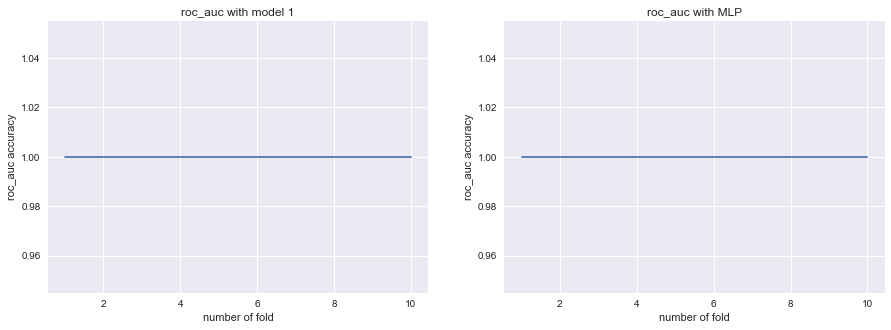

In [41]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))

x=[1,2,3,4,5,6,7,8,9,10]
plt.subplot(1,2,1)
plt.xlabel("number of fold")
plt.ylabel("roc_auc accuracy")
plt.title("roc_auc with model 1")
plt.plot(x,roc_auc_score1)

plt.subplot(1,2,2)
plt.plot(x,mlp_scores)
plt.xlabel("number of fold")
plt.ylabel("roc_auc accuracy")
plt.title("roc_auc with MLP")
plt.show()

So we implement the accuracy by using roc_auc_score, from the two graph, both of them have the same accuracy, 1. However, the wall time is different, in MLP, it is 7.4s but in model 1, the wall time is 15.8s. The reason is that our data set is classfication to predict the mushroom is edible or not, adding that the size of this data is not large. So it has more accuracy to predict the target. 

## Exceptional Work (t-SNE)

We use function 'get_weights' to get each embed layers weights and put into a list.

In [47]:
# Get weights for categorical variables
weights_ = []
name = []
for each in model.layers:
    if each.get_weights() != [] and 'embed' in each.name:
        weights_.append(each.get_weights())
        name.append(each.name)

In [48]:
weights_ 

[[array([[-0.08525081,  0.00647088],
         [ 0.02629232,  0.05382868],
         [-0.23484921, -0.17385057],
         [-0.1693809 , -0.00619119],
         [-0.03620773,  0.00064017],
         [-0.29428485, -0.11684953]], dtype=float32)],
 [array([[-0.05184896, -0.04836777],
         [-0.08913907, -0.12013109],
         [-0.17839694, -0.13739152],
         [-0.14327975, -0.17480265]], dtype=float32)],
 [array([[ 0.03352633,  0.07490214,  0.11896271],
         [-0.1084998 , -0.1958884 , -0.1739317 ],
         [-0.19436191, -0.22488263,  0.1008002 ],
         [-0.19241072, -0.17128481,  0.06193073],
         [-0.26615426, -0.21609396, -0.00516044],
         [-0.02369703, -0.00566699,  0.09115557],
         [-0.03341315, -0.06130844, -0.10689891],
         [-0.05692562, -0.0618717 , -0.07334443],
         [-0.04051803,  0.00786701,  0.22348216],
         [-0.02218378, -0.11254541,  0.21308859]], dtype=float32)],
 [array([[0.21451157],
         [0.06790746]], dtype=float32)],
 [array([[ 0

We could find the amount of dimension of every category feature's weight are different. So we use t-SNE to reduce all of them to 2 dimension to make it easier to visualize in a figure.

SNE maps data points to the probability distribution through affinitie transformation, which mainly includes two steps:
1.SNE constructs a probability distribution among high-dimensional objects, so that similar objects have a higher probability to be selected, while non-similar objects have a lower probability to be selected. 
2.SNE constructs the probability distribution of these points in the low dimensional space, making the probability distributions as similar as possible. 
We use the TSNE in sklearn.

In [49]:
from sklearn import manifold, datasets
from sklearn.manifold import TSNE

tsne_array = []
for eachweight in weights_:
    X=eachweight[0]
    if len(X) != 1:
        # Using T-SNE to reduce dimension. 
        X_tsne = manifold.TSNE(n_components=2, random_state=33)
        Y = X_tsne.fit_transform(X)
        tsne_array.append(Y)

In [50]:
tsne_array

[array([[  48.95353 , -125.736694],
        [  95.849304,   16.817947],
        [-101.11497 , -125.18663 ],
        [-146.96515 ,   17.705643],
        [ -25.235605,  105.46872 ],
        [ -25.701952,  -22.186705]], dtype=float32),
 array([[  76.33903  , -122.87477  ],
        [-212.5419   ,   -5.1987147],
        [-126.94037  , -208.47946  ],
        [  -9.262499 ,   80.40595  ]], dtype=float32),
 array([[-150.12393  ,   27.423492 ],
        [ -89.388016 ,  -65.30107  ],
        [  10.207848 , -113.34579  ],
        [ -62.14495  ,   31.42137  ],
        [ 108.94649  ,   71.007256 ],
        [  95.240906 ,  -31.601149 ],
        [ -79.860115 ,  122.001884 ],
        [   3.2949784,  -25.514091 ],
        [  19.935371 ,   59.684406 ],
        [  20.096598 ,  149.37108  ]], dtype=float32),
 array([[ 813.52246, -690.604  ],
        [-813.5227 ,  690.60376]], dtype=float32),
 array([[ 111.363716,  -76.87456 ],
        [-187.73215 ,  -65.5054  ],
        [ -53.2662  ,  201.76724 ],
        

Now, the number of all features' dimension is 2.
Then we get scatter plots for every category features, and we choose three of them to describe.

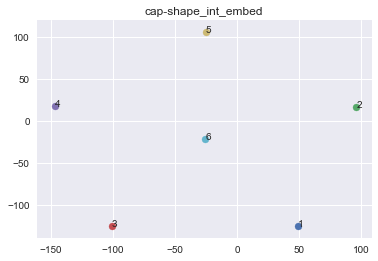

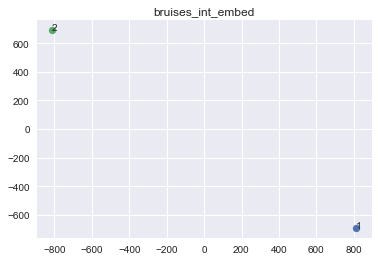

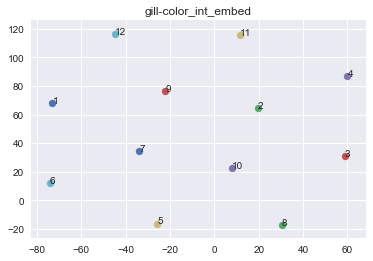

In [51]:
#Show the t-SNE plot by using scatter function. 
plt.figure()
index = [0,3,8]#choose the plots randomly
for i in index:
    for j in range(0,len(tsne_array[i])):
        plt.scatter(tsne_array[i][j][0],tsne_array[i][j][1])
        plt.annotate(j+1,(tsne_array[i][j][0],tsne_array[i][j][1]))    
    plt.title(name[i])
    plt.show()

In these plot, x, y axis represent the weight1 and weight2. If two points are close to each other, they are similar and the model might be confused to identify them. So, it is better if all points are distributed far away.
We could find that, in these plots, all points are distributed evenly and far away from each other. There is not the condition which two points are apparently closed. So, it is good.